In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/Users/chandu/MachineLearning_Project/Unified_mentor(Internship)/Projects/My_List/Mobile Phone Pricing/MPP.csv'
df = pd.read_csv(file_path)
print(f"Dataset '{file_path}' loaded successfully.")


X = df.drop('price_range', axis=1)

# y contains only the target variable, 'price_range'.
y = df['price_range']

print("\nFeatures (X) and target (y) have been separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


# --- 2. Split Data into Training and Testing Sets ---
# We split the data to train the model on one part and test it on another.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state=42 ensures that the split is the same every time we run the code,
# making our results reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData has been split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# --- 3. Scale the Features ---
# We use StandardScaler to scale our features to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()

# We fit the scaler ONLY on the training data to learn the scaling parameters (mean and std).
# Then we transform both the training and testing data using these learned parameters.
# This prevents information from the test set "leaking" into the training process.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For clarity, let's convert the scaled numpy arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


print("\nFeatures have been scaled.")
print("First 5 rows of the scaled training data (X_train_scaled):")
print(X_train_scaled.head())

print("\nFirst 5 rows of the scaled testing data (X_test_scaled):")
print(X_test_scaled.head())

print("\n--- Data Preparation Complete ---")
# The variables X_train_scaled, X_test_scaled, y_train, and y_test are now ready for model trainin

Dataset '/Users/chandu/MachineLearning_Project/Unified_mentor(Internship)/Projects/My_List/Mobile Phone Pricing/MPP.csv' loaded successfully.

Features (X) and target (y) have been separated.
Shape of X: (2000, 20)
Shape of y: (2000,)

Data has been split into training and testing sets.
X_train shape: (1600, 20)
X_test shape: (400, 20)
y_train shape: (1600,)
y_test shape: (400,)

Features have been scaled.
First 5 rows of the scaled training data (X_train_scaled):
   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0       1.548360 -0.981423    -1.236230  0.970437  0.620111 -1.046060   
1      -1.379535  1.018929     0.837112 -1.030464 -0.993561  0.955968   
2      -0.010914 -0.981423    -0.748385  0.970437 -0.532512  0.955968   
3      -1.043621 -0.981423    -0.504462 -1.030464 -0.532512 -1.046060   
4       0.488416  1.018929    -1.236230  0.970437  0.620111 -1.046060   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0    0.754832

In [4]:
# --- 4. Choose and Train the Model ---
# We are choosing the RandomForestClassifier.
# n_estimators=100 means it will build 100 decision trees.
# random_state=42 ensures the model's results are reproducible.
model = RandomForestClassifier(n_estimators=100, random_state=42)

print("\n--- Training the Random Forest Model ---")
# The .fit() method trains the model on our SCALED training data
model.fit(X_train_scaled, y_train)
print("Model training complete.")


--- Training the Random Forest Model ---
Model training complete.


In [6]:
# --- 5. Make Predictions on the Test Data ---
# We use the trained model to predict the price range for the scaled test data.
y_pred = model.predict(X_test_scaled)

print("\n--- Predictions Made on the Test Set ---")
print("First 10 predictions:", y_pred[:10])
print("First 10 actual values:", y_test.values[:10])


--- Predictions Made on the Test Set ---
First 10 predictions: [0 2 1 3 1 2 2 0 3 1]
First 10 actual values: [0 2 1 3 1 1 2 0 3 1]



--- Model Evaluation ---
Model Accuracy: 89.25%

Accuracy is the percentage of predictions the model got correct.

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400


This report shows how well the model performed for each individual price class (0, 1, 2, 3).

--- Confusion Matrix ---


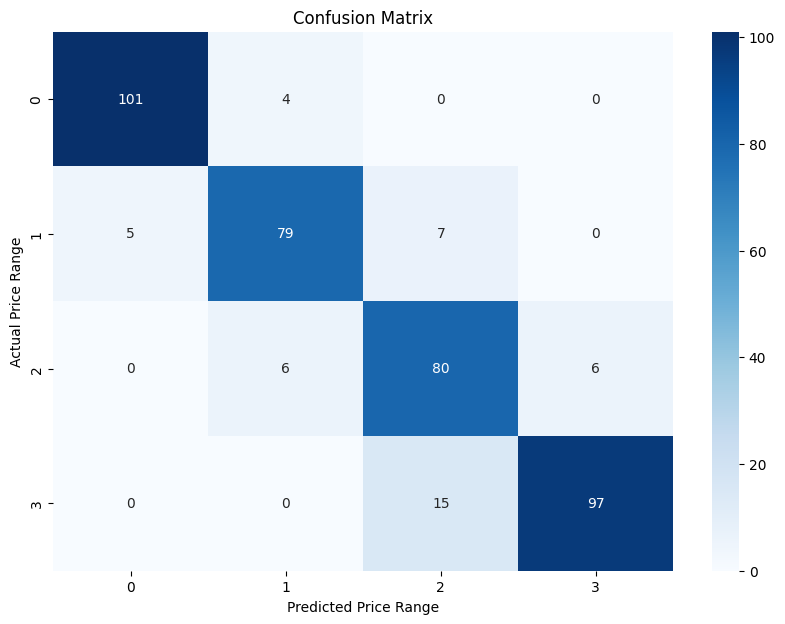


The confusion matrix shows correct predictions on the diagonal. Off-diagonal numbers are errors.


In [7]:
# --- 6. Evaluate the Model's Performance ---
# We compare the model's predictions (y_pred) with the actual values (y_test).

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\n--- Model Evaluation ---")
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nAccuracy is the percentage of predictions the model got correct.\n")

# 2. Classification Report
# This report gives us precision, recall, and f1-score for each price range class.
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))
print("\nThis report shows how well the model performed for each individual price class (0, 1, 2, 3).\n")

# 3. Confusion Matrix
# This shows us exactly where the model made correct and incorrect predictions.
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)

# For better visualization, we can plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.title('Confusion Matrix')
plt.show()
print("\nThe confusion matrix shows correct predictions on the diagonal. Off-diagonal numbers are errors.")


--- Visualizing What the Model Learned ---


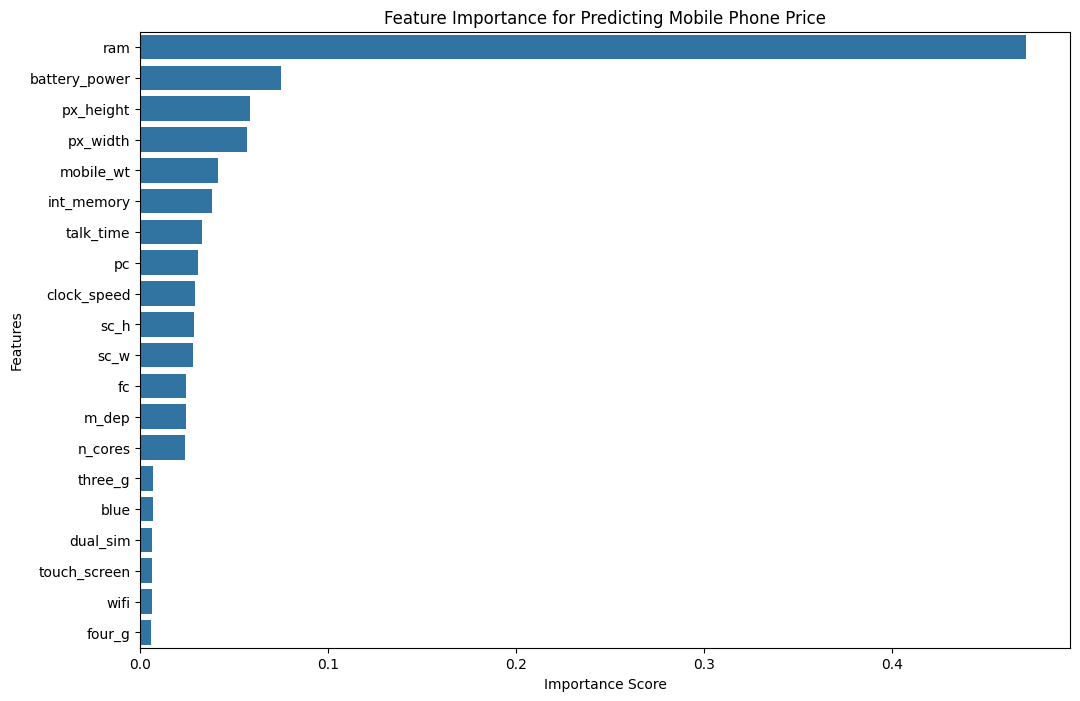


The plot above shows which features the model found most predictive.
A higher score means the feature was more important in the model's decisions.

Top 5 most important features:
ram              0.471005
battery_power    0.074854
px_height        0.058403
px_width         0.056563
mobile_wt        0.041445
dtype: float64


In [8]:
# --- 7. Visualize Model Learning: Feature Importance ---
# This step should be added after you have trained the model (after model.fit()).

print("\n--- Visualizing What the Model Learned ---")

# Extract feature importances from the trained model
feature_importances = model.feature_importances_

# Create a pandas Series for easier handling and plotting
# We use X.columns to get the names of the features
importances = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance in descending order
sorted_importances = importances.sort_values(ascending=False)

# Create a bar plot to visualize the importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index)

# Add labels and title for clarity
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Predicting Mobile Phone Price')
plt.show()

print("\nThe plot above shows which features the model found most predictive.")
print("A higher score means the feature was more important in the model's decisions.")
print("\nTop 5 most important features:")
print(sorted_importances.head(5))
